## Import dependencies

In [11]:
!pip3 install opencv-python pytesseract matplotlib scipy numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 307.3 kB/s eta 0:00:0000:0100:03


In [12]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import numpy as np
from scipy import signal

## Define dataset

Number of images: 433
Number of annotations: 433



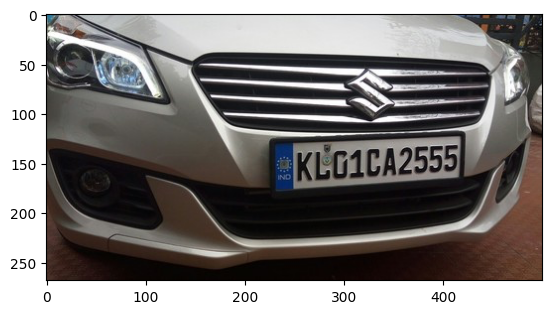

In [4]:
import os

images_path = 'dataset/images'
annotations_path = 'dataset/annotations'

image_files = os.listdir(images_path)
annotation_files = os.listdir(annotations_path)

print(f"Number of images: {len(image_files)}")
print(f"Number of annotations: {len(annotation_files)}")

# Show example with plot
image = cv2.imread(f"{images_path}/Cars0.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(pytesseract.image_to_string(image))
plt.imshow(image)

## Add bounding box overlay

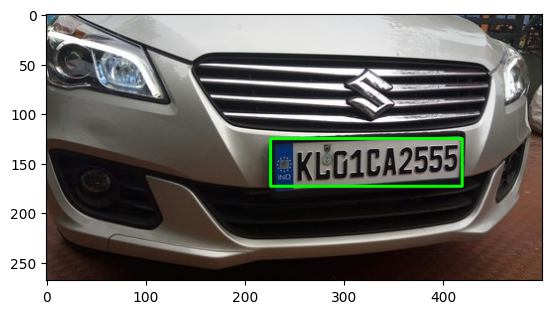

In [5]:
xml_file = f"{annotations_path}/Cars0.xml"
tree = ET.parse(xml_file)
root = tree.getroot()
annotated_image = image

for obj in root.findall('object'):
    bndbox = obj.find('bndbox')
    xmin = int(bndbox.find('xmin').text)
    ymin = int(bndbox.find('ymin').text)
    xmax = int(bndbox.find('xmax').text)
    ymax = int(bndbox.find('ymax').text)
    cv2.rectangle(annotated_image, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

plt.imshow(annotated_image)

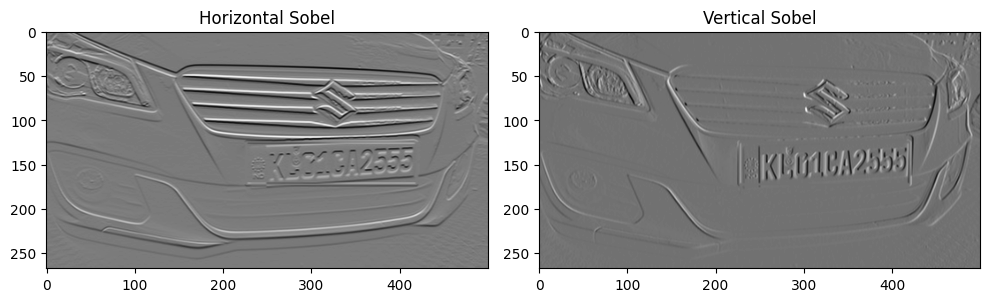

In [13]:
# Sobel
def sobel(image, horizontal: bool):
    filter = np.array([])
    if horizontal:
        filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
    else:
        filter = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    return signal.convolve2d(image, filter, mode='same', boundary='symm')

np_image = np.mean(image, axis=2)  # If image is RGB

# Horizontal
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(sobel(np_image, horizontal=True), cmap='gray')
plt.title('Horizontal Sobel')

# Vertical
plt.subplot(122)
plt.imshow(sobel(np_image, horizontal=False), cmap='gray')
plt.title('Vertical Sobel')

plt.tight_layout()
plt.show()